In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from pathlib import Path
import sys
parent_path = str(Path().joinpath('..').resolve())
sys.path.append(parent_path)

In [3]:
from triple_agent.parsing.replay.get_parsed_replays import get_parsed_replays
from triple_agent.constants.events import SCL5_DROPPED_PLAYERS, SCL5_DIVISIONS, select_scl5
from triple_agent.reports.specific.action_tests import action_test_percentages, diff_action_test_percentages
from triple_agent.classes.action_tests import ActionTest

In [4]:
scl5_replays = get_parsed_replays(select_scl5)

In [5]:
from triple_agent.reports.generation.generic_query import query
from triple_agent.reports.generation.plot_specs import AxisProperties, DataPlotProperties, DataQueryProperties
from triple_agent.reports.specific.action_tests import _at_rates_excluding_difficults

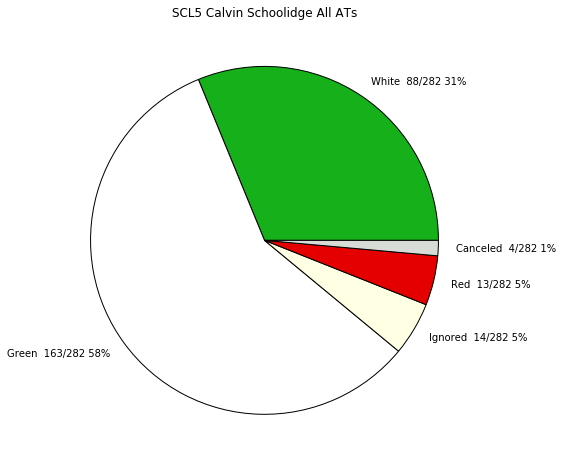

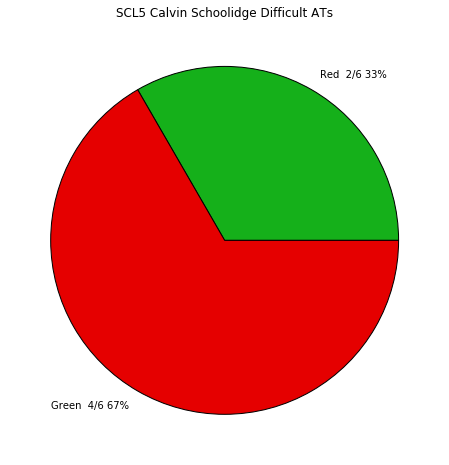

In [27]:
spy = 'Calvin Schoolidge'
individual_replays = list(filter(lambda g: g.spy == spy, scl5_replays))
action_test_percentages(
    individual_replays,
    axis_properties = AxisProperties(title=f'SCL5 {spy} All ATs', savefig='example_pictures/scl5_calvin_action_tests.png')
)
diff_action_test_percentages(
    individual_replays,
    axis_properties = AxisProperties(title=f'SCL5 {spy} Difficult ATs')
)

['Green', 'White', 'Ignored', 'Red', 'Canceled']
4
12.0 8.0
15.0 8.0


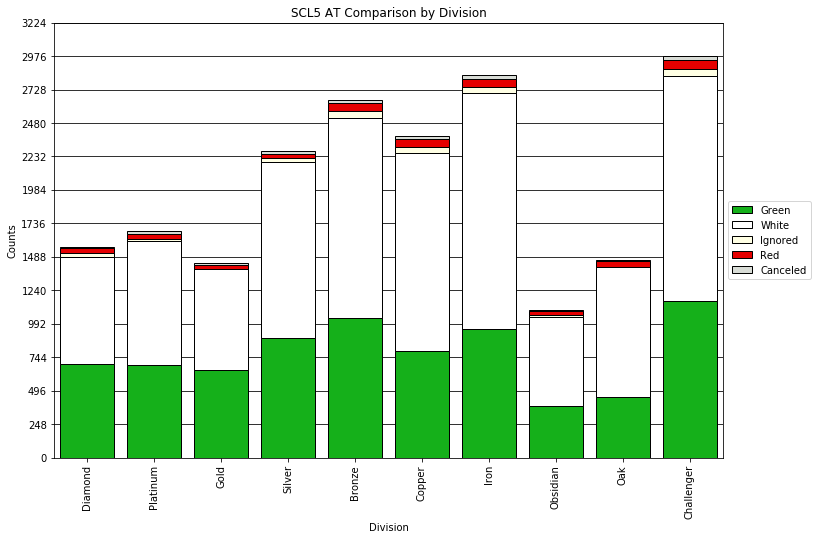

In [35]:
action_test_percentages(
    scl5_replays,
    axis_properties = AxisProperties(title='SCL5 AT Comparison by Division', x_axis_label='Division', y_axis_label='Counts'),
    data_query = DataQueryProperties(groupby=lambda g: g.division,category_name_order=lambda s: SCL5_DIVISIONS.index(s))
)

['Green', 'White', 'Ignored', 'Red', 'Canceled']
0


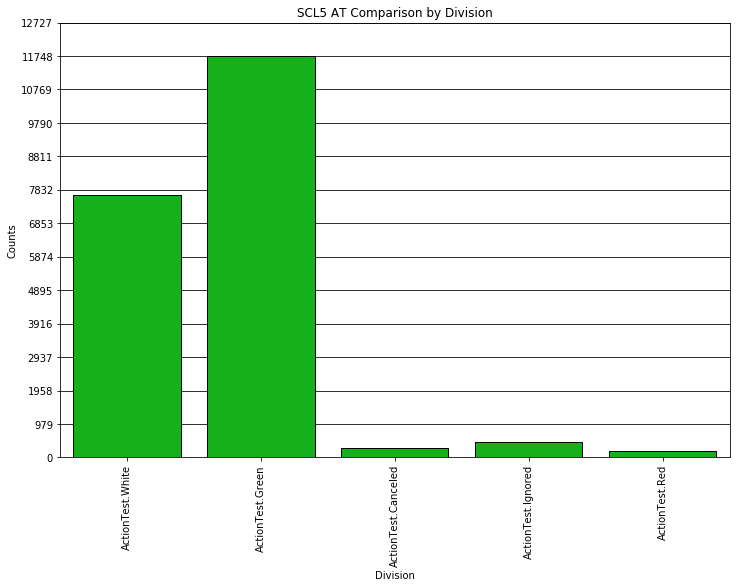

In [36]:
action_test_percentages(
    scl5_replays,
    axis_properties = AxisProperties(title='SCL5 AT Comparison by Division', x_axis_label='Division', y_axis_label='Counts'),
    data_query = DataQueryProperties(force_bar=True)
)

In [ ]:
diff_action_test_percentages(
    scl5_replays,
    'SCL5 Difficult AT Comparison by Division',
    groupby=lambda g: g.division,
    category_name_order=lambda s: SCL5_DIVISIONS.index(s),
)

In [ ]:
action_test_percentages(
    scl5_replays,
    'SCL5 AT Comparison by Week',
    groupby=lambda g: g.week,
)

In [ ]:
action_test_percentages(
    scl5_replays,
    'SCL5 Highest Green AT by Player',
    groupby=lambda g: g.spy,
    category_data_order=ActionTest.Green,
    limit=40,
    counts_plot=False,
    savefig='example_pictures/scl5_percent_action_tests.png'
)

In [ ]:
action_test_percentages(
    scl5_replays,
    'SCL5 Most ATs by Player',
    groupby=lambda g: g.spy,
    category_data_order=sum,
    limit=40,
    percentile_plot=False
)

In [ ]:
diff_action_test_percentages(
    scl5_replays,
    'SCL5 Highest Difficult Green AT by Player',
    groupby=lambda g: g.spy,
    category_data_order=ActionTest.Green,
    limit=40
)

In [ ]:
diff_action_test_percentages(
    scl5_replays,
    'SCL5 Most Difficult AT Attempts by Player',
    groupby=lambda g: g.spy,
    category_data_order=sum,
    limit=40,
    percentile_plot=False
)